In [69]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [70]:
!pip install xgboost lightgbm catboost scikit-learn


In [71]:
np.__version__

'2.3.1'

In [72]:
df =pd.read_csv("heart-disease (1).csv")
df.shape

(303, 14)

In [73]:
#Exploration
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [75]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

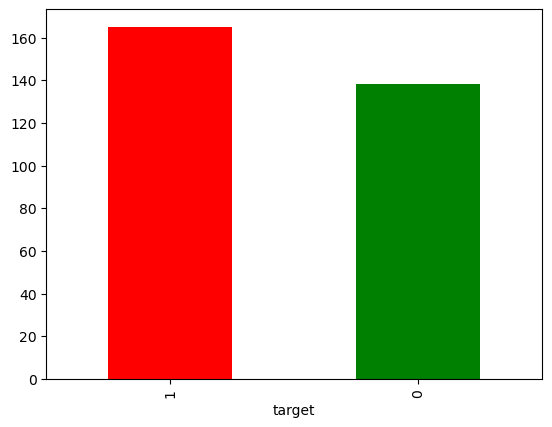

In [76]:
df["target"].value_counts().plot(kind="bar",color=["red",'green']);
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
##sex attribute compare with target
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

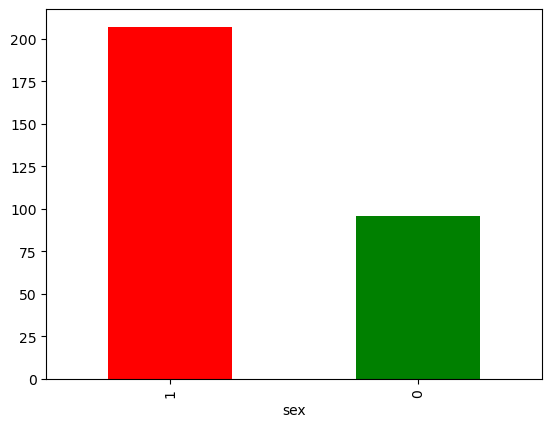

In [81]:
df["sex"].value_counts().plot(kind="bar",color=["red",'green']);
plt.show()

In [82]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


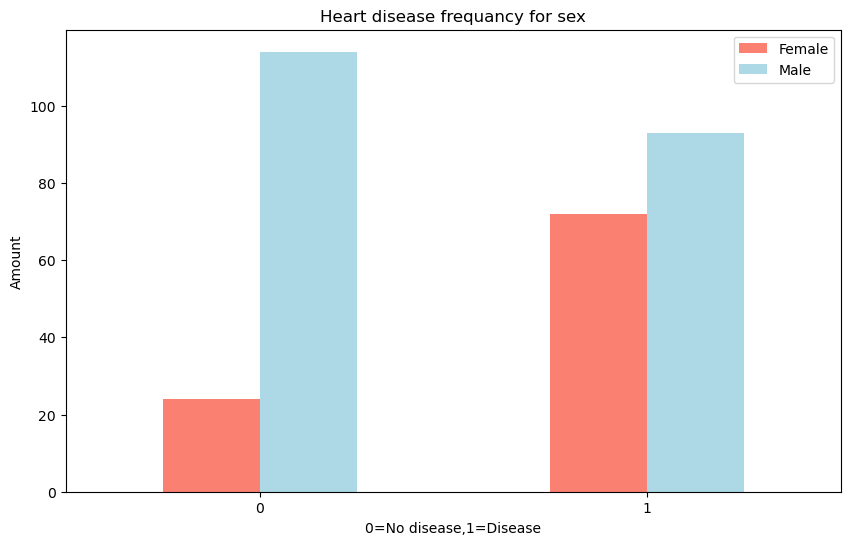

In [83]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart disease frequancy for sex")
plt.xlabel("0=No disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

plt.show()

In [84]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

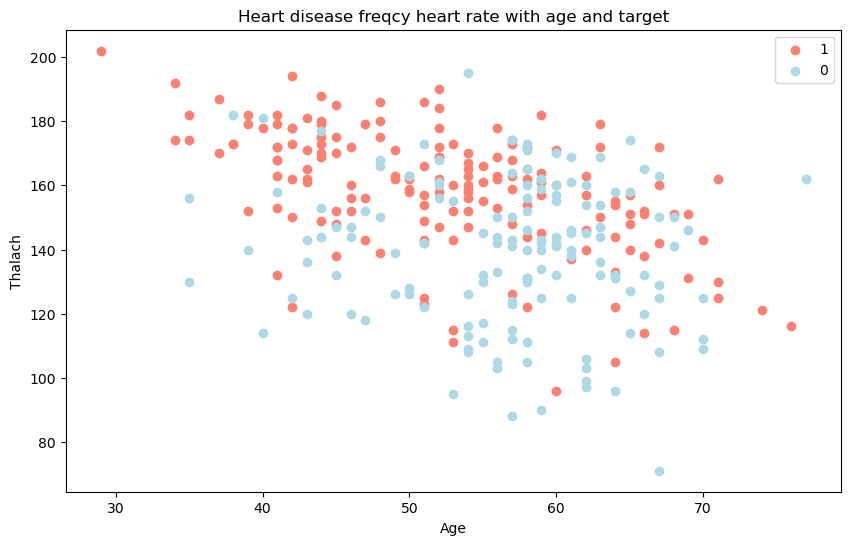

In [85]:
#here we compare 3 values age ,thal,tar we only see positive values
plt.figure(figsize=(10,6))
plt.title("Heart disease freqcy heart rate with age and target")
plt.xlabel("Age")
plt.ylabel("Thalach")

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.legend(["1","0"])




plt.show()

plt.show()

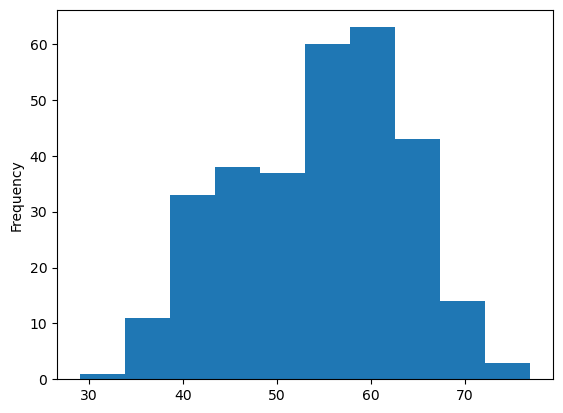

In [86]:
df.age.plot.hist();
plt.show()

In [87]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


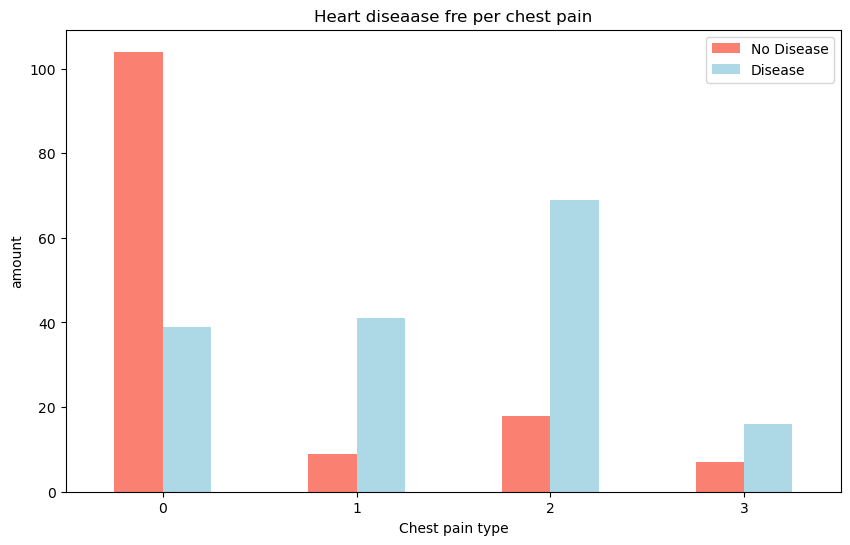

In [88]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]) 
plt.title("Heart diseaase fre per chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("amount")
plt.legend(["No Disease","Disease"] )
plt.xticks(rotation=0);
plt.show();

In [89]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


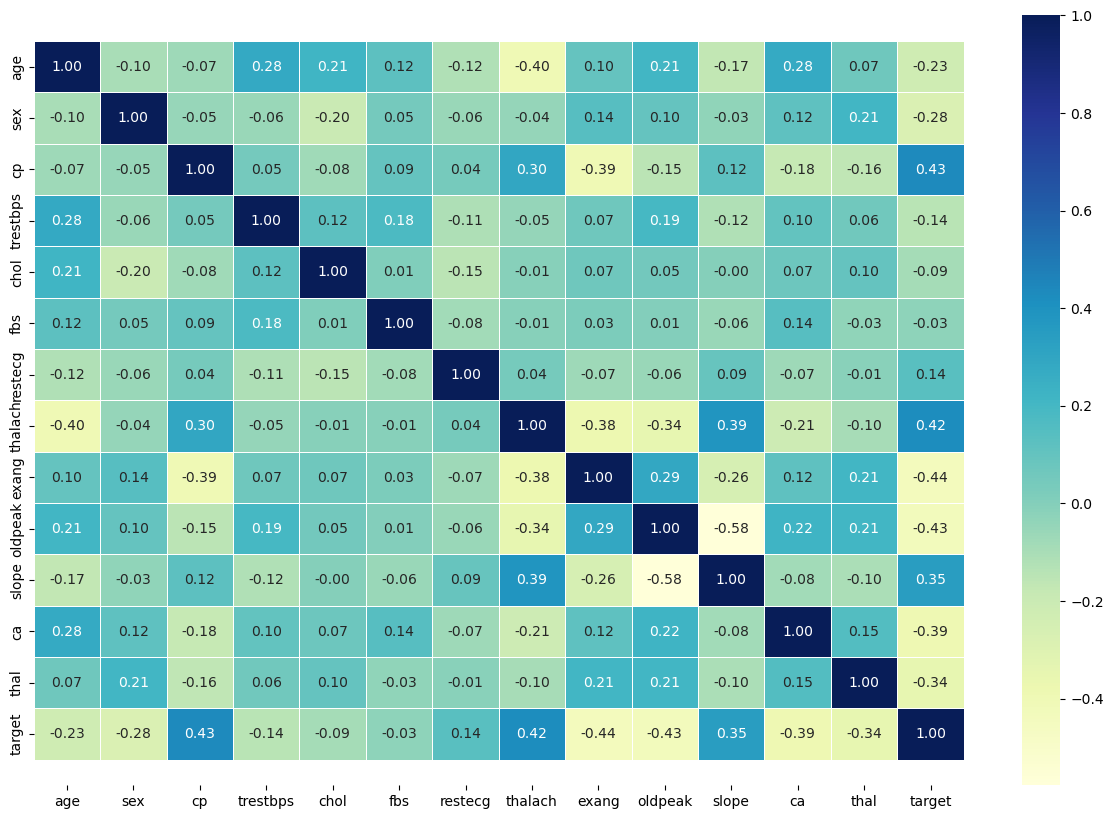

In [90]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)
plt.show();

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
X=df.drop("target",axis=1)
y=df["target"]

In [93]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [94]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [95]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [96]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "xgboost":XGBClassifier(),
         "lgb_model":LGBMClassifier(),
         "cat_model":CatBoostClassifier(verbose=0)}

def fit_and_score(models,X_train,X_test,y_train,y_test):

 np.random.seed(42)

 model_scores ={}

 for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
 return model_scores

In [97]:
import matplotlib.pyplot as plt
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\Aditya\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'xgboost': 0.819672131147541,
 'lgb_model': 0.8360655737704918,
 'cat_model': np.float64(0.8360655737704918)}

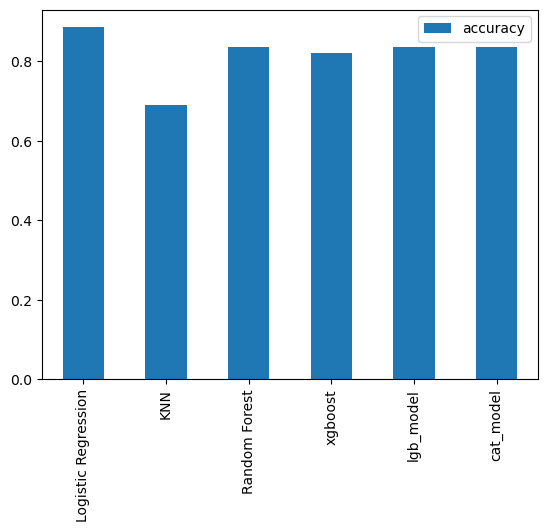

In [98]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.show();

In [99]:
train_scores =[]
test_scores=[]

neighbors=range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))



In [100]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [101]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data:75.41%


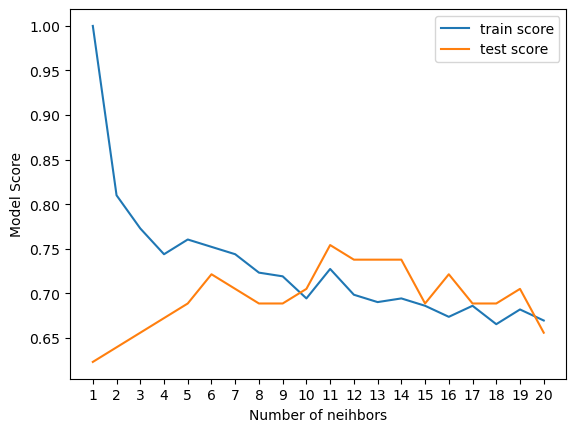

In [102]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neihbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test data:{max(test_scores)*100:.2f}%")
plt.show();

In [103]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [104]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 359 ms
Wall time: 510 ms


In [105]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [116]:
%%time 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Smaller hyperparameter grid to avoid very long training
rf_grid = {
    "n_estimators": [100, 200, 300],      # smaller range
    "max_depth": [None, 5, 10],          # fewer depths
    "min_samples_split": [2, 5, 10],     # reduced values
    "min_samples_leaf": [1, 2, 4]        # reduced values
}

# RandomizedSearchCV setup
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    n_iter=5,        # only try 5 random combos
    cv=3,            # use 3-fold CV instead of 5
    verbose=2,
    random_state=42,
    n_jobs=-1        # use all cores
)

# Fit model
rs_rf.fit(X_train, y_train)

print("Best Params:", rs_rf.best_params_)
print("Best Score:", rs_rf.best_score_)
print("Test Score:", rs_rf.score(X_test, y_test))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Best Score: 0.810082304526749
Test Score: 0.8688524590163934
CPU times: total: 141 ms
Wall time: 907 ms


In [117]:
rs_rf.score(X_test, y_test)


0.8688524590163934

In [118]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver": ["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [119]:
 gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [120]:
# rf_grid={"n_estimators": np.arange(10,1000,50),
#         "max_depth":[None,3,5,10],
#         "min_samples_split":np.arange(2,20,2),
#         "min_samples_leaf":np.arange(1,20,2)}
# rs_rf=GridSearchCV(RandomForestClassifier(),
#                        param_grid=rf_grid,
#                        cv=5,
#                        verbose=True)
# rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


KeyboardInterrupt: 

In [ ]:
# rs_rf.score(X_est,y_test)

In [121]:
y_preds = gs_log_reg.predict(X_test)

In [122]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

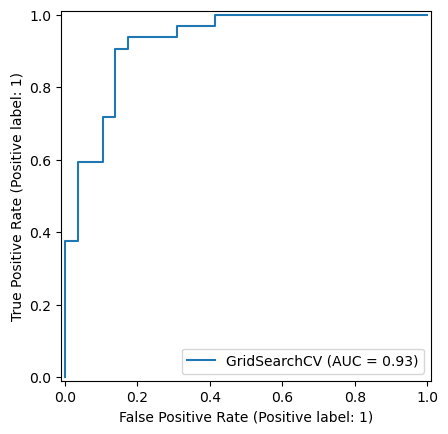

In [123]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show();


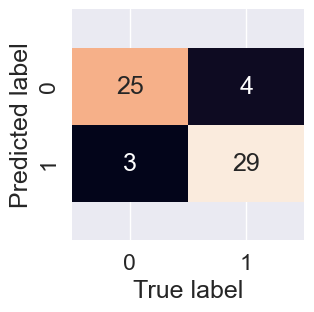

In [124]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax =plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom,top =ax.get_ylim()
    plt.ylabel("Predicted label")

    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom + 0.5,top - 0.5)
plot_conf_mat(y_test,y_preds);
plt.show();

    

In [125]:
25+29+4+3,len(y_preds)

(61, 61)

In [126]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [127]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [128]:
clf= LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [131]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [132]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [133]:
np.mean(cv_acc)

np.float64(0.8446994535519124)

In [134]:

cv_precision =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [135]:

cv_recall =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [136]:

cv_f1 =cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

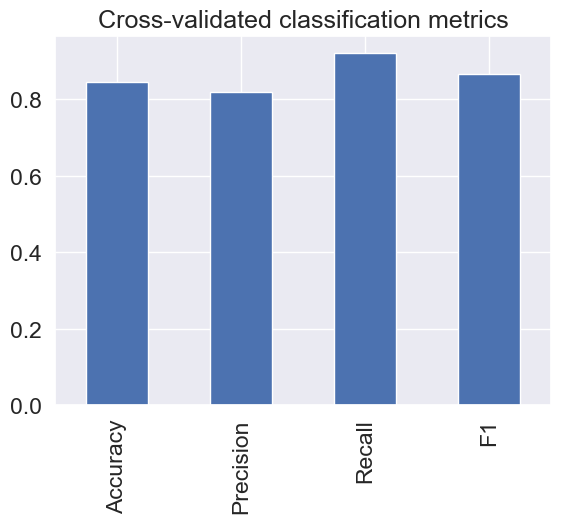

In [137]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0]);

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
plt.show();

In [138]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [139]:
clf.coef_ #contribut of features 

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [140]:
feature_dict=dict((zip(df.columns,list(clf.coef_[0]))))
feature_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

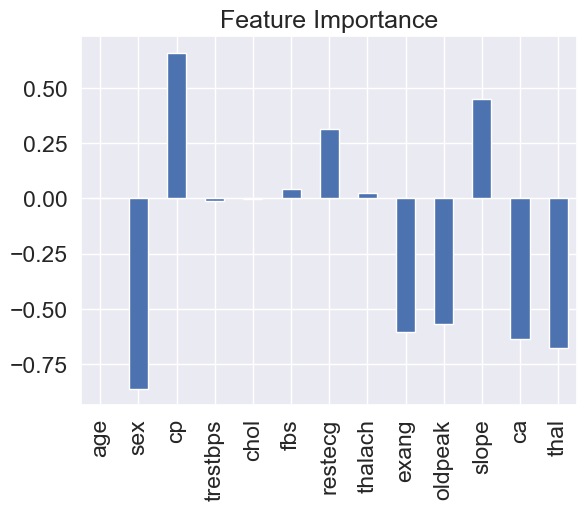

In [141]:
feature_df=pd.DataFrame(feature_dict,index=[0]);
feature_df.T.plot.bar(title="Feature Importance",legend=False);
plt.show();

In [142]:
pd.crosstab(df["sex"],df["target"]) #sex dec targ inc

target,0,1
sex,,
0,24,72
1,114,93


In [143]:
pd.crosstab(df["slope"],df["target"])#slope inc target inc

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [151]:

# Fix random seed
np.random.seed(42)

# Define parameter grid for RandomizedSearchCV
rf_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Initialize Random Forest with random search
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    n_jobs=-1
)

# Train on training data
rs_rf.fit(X_train, y_train)

# Get the best model
final_model = rs_rf.best_estimator_

# Save best model as heart_model.pkl
with open("heart_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Model trained and saved as heart_model.pkl")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model trained and saved as heart_model.pkl


In [ ]:
import pickle

# If you trained using RandomizedSearchCV
# Make sure rs_rf.fit(X_train, y_train) is already executed

# Get the best trained model
final_model = rs_rf.best_estimator_

# Save it as heart_model.pkl
with open("heart_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("✅ Model saved successfully as heart_model.pkl")
